In [1]:
import lcv_fitting as lcv 
import matplotlib.pyplot as plt 
import numpy as np

%matplotlib inline 
%load_ext autoreload
%autoreload 2


In [2]:
# Read in the data from an ascii file
filters, data = lcv.read_lcv('test_lcvs/NGC6121_V2.lcv')


Finding optimal frequency:
 - Estimated peak width = 0.00108
 - Using 5 steps per peak; omega_step = 0.000215
 - User-specified period range:  0.2 to 0.9
 - Computing periods at 113646 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps


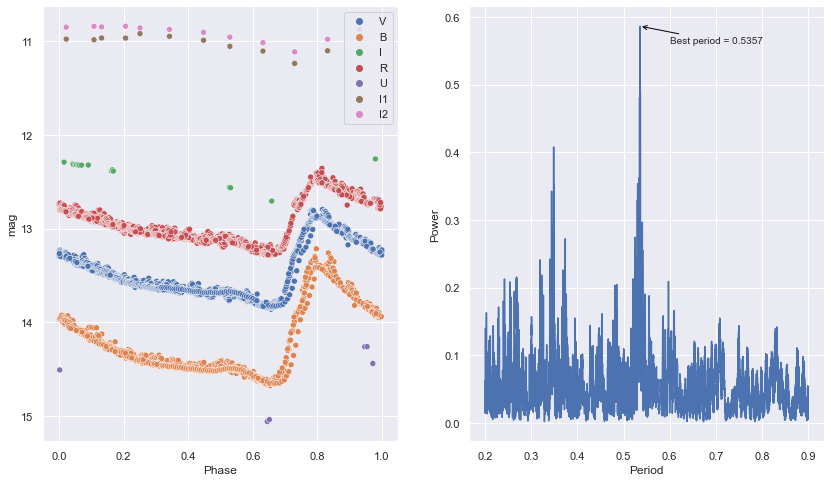

In [3]:
# Use a multiband Lomb Scargle to find the period of the variable star 
best_period = lcv.get_gatspy_period(data)


Available filters: ['B' 'I' 'I1' 'I2' 'R' 'U' 'V']

  --> B: Process completed successfully
  --> I: Not enough phase coverage in light curve
  --> I1: Process completed successfully
  --> I2: Process completed successfully
  --> R: Process completed successfully
  --> U: Not enough valid datapoint in light curve
  --> V: Process completed successfully


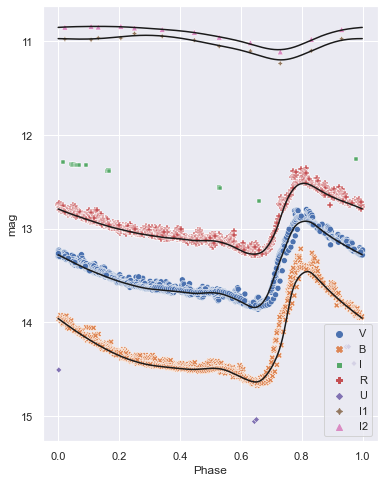

In [4]:
# Fit the light curve using GLOESS. Filters that do not contain enough 
# data points or coverage in phase will automatically be skipped. 

print('Available filters: {}\n'.format(filters))

fig, ax = plt.subplots(1,1, figsize=(6, 8))
ax.invert_yaxis()
lcv.phase_lcv(data, 'test', best_period, plot=1, ax=ax, errorbars=False)
ax.set_xlabel('Phase')
ax.set_ylabel('mag')

for i in range(len(filters)): 
    data_this_filter = data[data['filter'] == filters[i]]
    
    t, tt, ttt = lcv.lcv_gloess(data_this_filter, best_period, make_plot=False, min_n_obs=12, max_delta_phase=0.3)

    if ttt['mag'][0] != 0:
        ax.plot(ttt['phase'], ttt['mag'], color='k')
        

  --> I1: Process completed successfully
  --> I2: Process completed successfully
  --> B: Process completed successfully
  --> V: Process completed successfully
  --> R: Process completed successfully


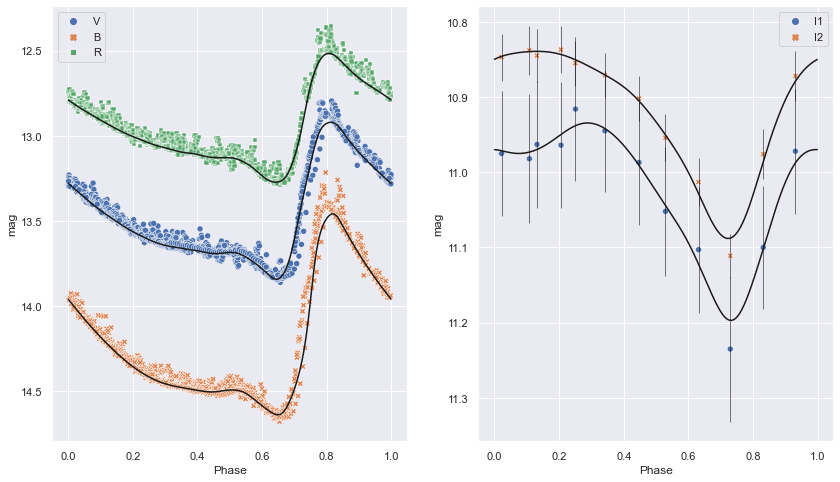

In [5]:
# If you have many filters, you may want to group them and plot separately, 
# for better data visualization 

fig, ax = plt.subplots(1,2, figsize=(14, 8))
ax[0].invert_yaxis()
ax[1].invert_yaxis()
ax[0].set_xlabel('Phase')
ax[0].set_ylabel('mag')
ax[1].set_xlabel('Phase')
ax[1].set_ylabel('mag')

select = (data['filter'] == 'I1') | (data['filter'] == 'I2')
lcv.phase_lcv(data[select], 'test', best_period, plot=1, ax=ax[1])

filt = ['I1', 'I2']
for i in range(2): 
    data_this_filter = data[data['filter'] == filt[i]]
    
    t, tt, ttt = lcv.lcv_gloess(data_this_filter, best_period, make_plot=False, min_n_obs=12, max_delta_phase=0.2)

    if ttt['mag'][0] != 0:
        ax[1].plot(ttt['phase'], ttt['mag'], color='k')

select = (data['filter'] == 'B') | (data['filter'] == 'V') | (data['filter'] == 'R')
lcv.phase_lcv(data[select], 'test', best_period, plot=1, ax=ax[0], errorbars=False)

filt = ['B', 'V', 'R']
for i in range(3): 
    data_this_filter = data[data['filter'] == filt[i]]
    
    t, tt, ttt = lcv.lcv_gloess(data_this_filter, best_period, make_plot=False, min_n_obs=12, max_delta_phase=0.2)

    #if ttt['mag'][0] != 0:
    ax[0].plot(ttt['phase'], ttt['mag'], color='k')
        
        